<a href="https://colab.research.google.com/github/jfcoderx/Data-Sciense/blob/main/SQLite3_connect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ma'lumotlar ombori bilan ishlash

Maʼlumotlar Bazasi (MB) bu – maʼlumotlarni saqlash, oʻqish, qayta ishlash va qidirish uchun<br>moʻljallangan markaziy maʼlumotlar ombori. Turli dasturlar yaratar ekanmiz, dastur ishlashiga oid<br>boʻlgan maʼlumotlarni u yoki bu koʻrinishda saqlashimiz kerak. Misol uchun dastur foydalanuvchilari<br>va ularning shaxsiy maʼlumotlari, rasmlari, postlar, mahsulotlar va hokazo.

Bu maʼlumotlarni qay koʻrinishda saqlash, turli maʼlumotlar oʻrtasidagi munosabatlar<br>(foydalanuvchi-post, mijoz-mahsulot), bu maʼlumotlarga murojaat qilish va unumli<br>foydalanish uchun MBni toʻgʻri loyihalash juda muhim ahamiyatga ega.

Bugungi kunda maʼlumotlar bazasini boshqarish uchun turli tizimlar mavjud. <br>Bulardan eng mashhurlari: MySQL, Oracle DB, PostgreSQL, MongoDB, SQLite,<br> Microsoft SQL server, IBM DB2.

Ma'lumotlar omborida ma'lumotlar jadvallar ko'rinishida saqlanadi.<br>
Jadvallar u yoki bu ko'rinishda bir-biriga bog'langan bo'lishi mumkin:

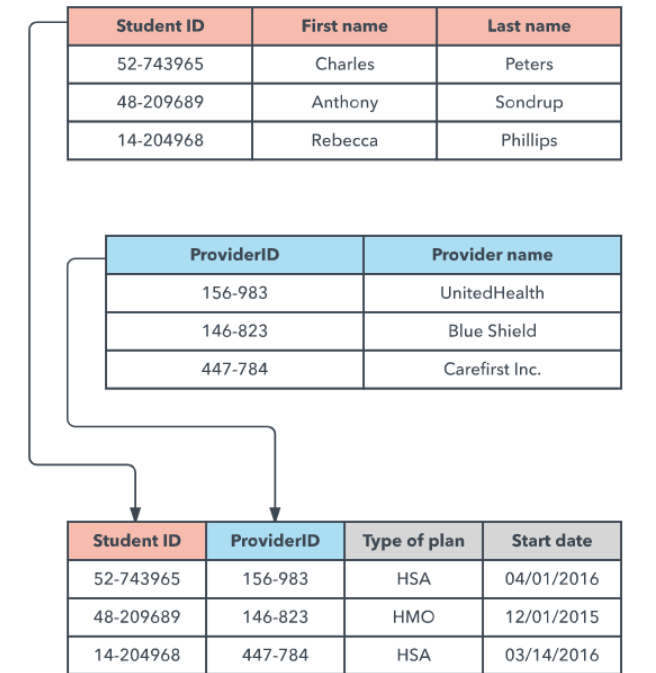

### SQL tili


Ushbu darsimizda biz eng ken tarqalgan SQL (Structured Query Language)<br>
tili yordamida ma'lumotlar ombori bilan ishlashni o'rganamiz.

Bu til yordamida MySQL, PostgreSQL, Sqlite kabi omborlar bilan ishlash mumkin.

#### SQLning asosiy buyruqlari

- **SELECT** - MOdan ma'lumot olish
- **UPDATE** - MOdagi ma'lumotlarni yangilash
- **DELETE** - MOdan ma'lumot o'chirish
- **INSERT INTO** - MOga yangi ma'lumot qo'shish
- **CREATE DATABASE** - Yangi MO yaratish
- **ALTER DATABASE** - MOni o'zgartirish
- **CREATE TABLE** - Yangi jadval yaratish
- **ALTER TABLE** - Jadvalni o'zgartirish
- **DROP TABLE** - Jadvalni o'chirish
- **CREATE INDEX** - Indeks yaratish
- **DROP INDEX** - Indeks o'chirish

SQL buyruqlar barcha SQL turdagi omborlar uchun bir xil bo'lgani sabab,<br>amaliyot uchun aynan qaysi turdagi ombordan foydalanish ahamiyatsiz.

Agar shaxsiy komputerdagi <br>
JUPITER NOTEBOOK programmada yuklamoqchi bolsangiz



1. PostgreSQL bilan ishlash uchun psycopg2 kutubxonasini o'rnatamiz


In [2]:
# !pip install psycopg2-binary
# import psycopg2 as psql

2. PostgreSQL ga ulanish

In [3]:
# pdb = psql.connect(
#     host = "localhost",
#     database = "postgres",
#     user = "postgres",
#     password = "PAROLINGIZ"
# )
# cursor = pdb.cursor()
# cursor.execute("SELECT version()")
# print(cursor.fetchone())

<br>

### SQLite

In [4]:
import pandas as pd
import sqlite3 as sql
from pprint import pprint

Boshlanishiga web sahifadan tayyor malumotlar bazasini yuklab olamiz:

In [5]:
## Agar shaxsiy kompyuterda, Jupyter Notebookda ishlasangiz keyingi 4 qatorni ishga tushuring

# url = "https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip"
# from urllib.request import urlretrieve
# import shutil
# urlretrieve(url, "chinook.zip") # faylni yuklab olish
# shutil.unpack_archive("chinook.zip") # zip faylni ochish

In [6]:
!wget https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip

--2022-10-31 12:21:09--  https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
Resolving www.sqlitetutorial.net (www.sqlitetutorial.net)... 151.139.128.11
Connecting to www.sqlitetutorial.net (www.sqlitetutorial.net)|151.139.128.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305596 (298K) [application/zip]
Saving to: ‘chinook.zip’

chinook.zip         100%[===================>] 298.43K  --.-KB/s    in 0.01s   

2022-10-31 12:21:09 (19.5 MB/s) - ‘chinook.zip’ saved [305596/305596]



Yuklab olingan fayl zip korinishida, uni ochishimiz kerak:

In [7]:
!unzip chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


zip faylini ochdik va bizda chinook.db degan fayl paydo bo'ldi<br>

biz bu malumotlar bazasiga ulanamiz:<br>
Biz db degan obyekt yaratamiz, bu bizning<br> 
bevosita chinook.db bilan ishlaydigan obyekt boladi.

In [8]:
db = sql.connect('chinook.db')

Biz chinook.db bilan ulanyapmiz. Bu malumot bazasi yaxshigina mashhur,<br>
ular trenerovka uchun ishlab chiqilgan, ichida kopgina jadvallar mavjud.<br> Kopchilik sqlite organayotganda shu malumotlar bazasidan foydalanadi

db obyektimiz chinook.db ga ulangan turibdi<br>

lekin turli xil sql komandalarni ishga tushurish <br>
uchun maxsus cursor degan obyekt yaratib olinadi

In [9]:
curr = db.cursor()

Malumotlar bazasi ichidagi jadvallarni ko'raylik:<br>
execute() dan foydalanmiz - bu bajarish degani,<br> 
uni ichiga sql komandasini yozamiz<br>
keyin natijani chiqarish uchun<br>
fetchall(), fetchmany(), fetchone() dan foydalanamiz<br>
hamma jadvallar, kop jadvallar, bitta jadval ni chiqarish degani<br>

In [10]:
curr.execute("SELECT name FROM sqlite_master WHERE type='table';")
curr.fetchall()

[('albums',),
 ('sqlite_sequence',),
 ('artists',),
 ('customers',),
 ('employees',),
 ('genres',),
 ('invoices',),
 ('invoice_items',),
 ('media_types',),
 ('playlists',),
 ('playlist_track',),
 ('tracks',),
 ('sqlite_stat1',)]

Yuqorida mavjud jadvallar nomi chiqarildi.

Jadvallar nechta qatordan iboratligini koraylik:

In [11]:
curr.execute("SELECT COUNT(*) FROM customers")
curr.fetchone() # chunki bizga endi bitta qiymat kerak

(59,)

In [12]:
curr.execute("SELECT COUNT(*) FROM customers")
curr.fetchall()

[(59,)]

In [13]:
curr.execute("SELECT COUNT(*) FROM artists")
curr.fetchone()

(275,)

In [14]:
curr.execute("SELECT COUNT(*) FROM employees")
curr.fetchone()

(8,)

Jadvaldagi ustunlar sonini kormoqchi bolsak:<br>
PRAGMA dan foydalanamiz, lekin bu komanda faqat SQLITE ga xos.

In [15]:
curr.execute("PRAGMA table_info(customers)")
curr.fetchall()

[(0, 'CustomerId', 'INTEGER', 1, None, 1),
 (1, 'FirstName', 'NVARCHAR(40)', 1, None, 0),
 (2, 'LastName', 'NVARCHAR(20)', 1, None, 0),
 (3, 'Company', 'NVARCHAR(80)', 0, None, 0),
 (4, 'Address', 'NVARCHAR(70)', 0, None, 0),
 (5, 'City', 'NVARCHAR(40)', 0, None, 0),
 (6, 'State', 'NVARCHAR(40)', 0, None, 0),
 (7, 'Country', 'NVARCHAR(40)', 0, None, 0),
 (8, 'PostalCode', 'NVARCHAR(10)', 0, None, 0),
 (9, 'Phone', 'NVARCHAR(24)', 0, None, 0),
 (10, 'Fax', 'NVARCHAR(24)', 0, None, 0),
 (11, 'Email', 'NVARCHAR(60)', 1, None, 0),
 (12, 'SupportRepId', 'INTEGER', 0, None, 0)]

misol employees jadvalni hammasini chiqaraylik:

In [16]:
curr.execute("SELECT * FROM employees")
curr.fetchall()

[(1,
  'Adams',
  'Andrew',
  'General Manager',
  None,
  '1962-02-18 00:00:00',
  '2002-08-14 00:00:00',
  '11120 Jasper Ave NW',
  'Edmonton',
  'AB',
  'Canada',
  'T5K 2N1',
  '+1 (780) 428-9482',
  '+1 (780) 428-3457',
  'andrew@chinookcorp.com'),
 (2,
  'Edwards',
  'Nancy',
  'Sales Manager',
  1,
  '1958-12-08 00:00:00',
  '2002-05-01 00:00:00',
  '825 8 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 2T3',
  '+1 (403) 262-3443',
  '+1 (403) 262-3322',
  'nancy@chinookcorp.com'),
 (3,
  'Peacock',
  'Jane',
  'Sales Support Agent',
  2,
  '1973-08-29 00:00:00',
  '2002-04-01 00:00:00',
  '1111 6 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5M5',
  '+1 (403) 262-3443',
  '+1 (403) 262-6712',
  'jane@chinookcorp.com'),
 (4,
  'Park',
  'Margaret',
  'Sales Support Agent',
  2,
  '1947-09-19 00:00:00',
  '2003-05-03 00:00:00',
  '683 10 Street SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5G3',
  '+1 (403) 263-4423',
  '+1 (403) 263-4289',
  'margaret@chinookcorp.com'),
 (5,


Lekin korinib turgandek bu uncha qulay emas, list shaklida chiqdi,<br>
ishchilar soni millionlab bolganda bu bizga juda noqulaylik tugdiradi<br>
bizga bu malumotlarni ishlashimiz uchun jadval korinishida bolgani yaxshi

### Jadvalni ni DFga o'qish

PANDAS da buni jadvalga aylantirib beradigan funksiya bor:<br>
`pd.read_sql("SELECT * FROM employees", db)`<br>

funksiya argumenti sifatida:<br>
1- sql komandasi, 2- qaysi database ekanligi

In [17]:
df = pd.read_sql("SELECT * FROM employees", db)
df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


pandasni ozi jadval qilib ketguncha indekslab ketdi:<br>
biz customer_id ni ozini index sifatida foydalansak boladi:

In [18]:
df = pd.read_sql("SELECT * FROM employees", db, index_col='EmployeeId')
df

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [19]:
pd.read_sql("SELECT * FROM artists LIMIT 10", db)
# artists (275, ) jadvaldan boshidagi 10 tasini chiqarish

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
5,6,Antônio Carlos Jobim
6,7,Apocalyptica
7,8,Audioslave
8,9,BackBeat
9,10,Billy Cobham


In [20]:
pd.read_sql("SELECT * FROM artists LIMIT 10", db, index_col='ArtistId')
# artists (275, ) jadvaldan boshidagi 10 tasini chiqarish

,Name
ArtistId,
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains
6,Antônio Carlos Jobim
7,Apocalyptica
8,Audioslave
9,BackBeat


In [21]:
pd.read_sql("SELECT * FROM customers LIMIT 10", db,)
# customers jadvaldan boshidagi 10 tasini chiqarish

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [22]:
pd.read_sql("SELECT CustomerId, FirstName, LastName, Email FROM customers LIMIT 10", db, index_col='CustomerId')
# customers jadvaldan boshidagi 10 tasini FirstName, LastName, Email larini chiqarish, indexni CustomerID qilgan holda

,FirstName,LastName,Email
CustomerId,,,
1,Luís,Gonçalves,luisg@embraer.com.br
2,Leonie,Köhler,leonekohler@surfeu.de
3,François,Tremblay,ftremblay@gmail.com
4,Bjørn,Hansen,bjorn.hansen@yahoo.no
5,František,Wichterlová,frantisekw@jetbrains.com
6,Helena,Holý,hholy@gmail.com
7,Astrid,Gruber,astrid.gruber@apple.at
8,Daan,Peeters,daan_peeters@apple.be
9,Kara,Nielsen,kara.nielsen@jubii.dk


### Tartiblash (ORDER BY) va Saralash (DISTINCT)

In [23]:
# comandni alohida yozib oldik, ishlash oson bolishi uchun

comand = "SELECT CustomerId, FirstName, LastName, Email, Country FROM customers"
pd.read_sql(comand, db, index_col='CustomerId').head(10)

,FirstName,LastName,Email,Country
CustomerId,,,,
1,Luís,Gonçalves,luisg@embraer.com.br,Brazil
2,Leonie,Köhler,leonekohler@surfeu.de,Germany
3,François,Tremblay,ftremblay@gmail.com,Canada
4,Bjørn,Hansen,bjorn.hansen@yahoo.no,Norway
5,František,Wichterlová,frantisekw@jetbrains.com,Czech Republic
6,Helena,Holý,hholy@gmail.com,Czech Republic
7,Astrid,Gruber,astrid.gruber@apple.at,Austria
8,Daan,Peeters,daan_peeters@apple.be,Belgium
9,Kara,Nielsen,kara.nielsen@jubii.dk,Denmark


In [24]:
# ism boyicha tartiblaylik

comand = "SELECT CustomerId, FirstName, LastName, Email, Country FROM customers ORDER BY FirstName"
pd.read_sql(comand, db, index_col='CustomerId').head(10)

,FirstName,LastName,Email,Country
CustomerId,,,,
32,Aaron,Mitchell,aaronmitchell@yahoo.ca,Canada
11,Alexandre,Rocha,alero@uol.com.br,Brazil
7,Astrid,Gruber,astrid.gruber@apple.at,Austria
4,Bjørn,Hansen,bjorn.hansen@yahoo.no,Norway
39,Camille,Bernard,camille.bernard@yahoo.fr,France
8,Daan,Peeters,daan_peeters@apple.be,Belgium
20,Dan,Miller,dmiller@comcast.com,USA
56,Diego,Gutiérrez,diego.gutierrez@yahoo.ar,Argentina
40,Dominique,Lefebvre,dominiquelefebvre@gmail.com,France


In [25]:
# mamlakat boyicha tartiblaylik

comand = "SELECT CustomerId, FirstName, LastName, Email, Country FROM customers ORDER BY Country"
pd.read_sql(comand, db, index_col='CustomerId').head(10)

,FirstName,LastName,Email,Country
CustomerId,,,,
56,Diego,Gutiérrez,diego.gutierrez@yahoo.ar,Argentina
55,Mark,Taylor,mark.taylor@yahoo.au,Australia
7,Astrid,Gruber,astrid.gruber@apple.at,Austria
8,Daan,Peeters,daan_peeters@apple.be,Belgium
1,Luís,Gonçalves,luisg@embraer.com.br,Brazil
10,Eduardo,Martins,eduardo@woodstock.com.br,Brazil
11,Alexandre,Rocha,alero@uol.com.br,Brazil
12,Roberto,Almeida,roberto.almeida@riotur.gov.br,Brazil
13,Fernanda,Ramos,fernadaramos4@uol.com.br,Brazil


Aynan qaysi davlatlardan borligini koraylik:<br>
Yani davlatlarni takrorlanmas qilib chiqaraylik:

In [26]:
comand = "SELECT DISTINCT Country FROM customers"
curr.execute(comand)
curr.fetchall()

[('Brazil',),
 ('Germany',),
 ('Canada',),
 ('Norway',),
 ('Czech Republic',),
 ('Austria',),
 ('Belgium',),
 ('Denmark',),
 ('USA',),
 ('Portugal',),
 ('France',),
 ('Finland',),
 ('Hungary',),
 ('Ireland',),
 ('Italy',),
 ('Netherlands',),
 ('Poland',),
 ('Spain',),
 ('Sweden',),
 ('United Kingdom',),
 ('Australia',),
 ('Argentina',),
 ('Chile',),
 ('India',)]

In [27]:
# df korinishida chiqarmoqchi bolsak

comand = "SELECT DISTINCT Country FROM customers"
pd.read_sql(comand, db)

,Country
0,Brazil
1,Germany
2,Canada
3,Norway
4,Czech Republic
5,Austria
6,Belgium
7,Denmark
8,USA
9,Portugal


### Filtrlash (WHERE)

Jadvaldan faqat bir mamlakatga tegishli mijozlarni ajratib olaylik

In [28]:
# Italiyalik mijoz

comand = "SELECT * FROM customers WHERE Country = 'Italy'"
pd.read_sql(comand, db)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,47,Lucas,Mancini,None,"Via Degli Scipioni, 43",Rome,RM,Italy,00192,+39 06 39733434,None,lucas.mancini@yahoo.it,5


In [29]:
# Amerikalik mijoz

comand = "SELECT * FROM customers WHERE Country = 'USA'"
pd.read_sql(comand, db)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
1,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
2,18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3
3,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
4,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4
5,21,Kathy,Chase,None,801 W 4th Street,Reno,NV,USA,89503,+1 (775) 223-7665,None,kachase@hotmail.com,5
6,22,Heather,Leacock,None,120 S Orange Ave,Orlando,FL,USA,32801,+1 (407) 999-7788,None,hleacock@gmail.com,4
7,23,John,Gordon,None,69 Salem Street,Boston,MA,USA,2113,+1 (617) 522-1333,None,johngordon22@yahoo.com,4
8,24,Frank,Ralston,None,162 E Superior Street,Chicago,IL,USA,60611,+1 (312) 332-3232,None,fralston@gmail.com,3
9,25,Victor,Stevens,None,319 N. Frances Street,Madison,WI,USA,53703,+1 (608) 257-0597,None,vstevens@yahoo.com,5


In [30]:
# Amerikalik mijozlar State CA bolgan

comand = "SELECT * FROM customers WHERE Country = 'USA' AND State = 'CA'"
pd.read_sql(comand, db)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
1,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
2,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


In [31]:
# Argentinalik yoki Braziliyalik mijoz

comand = "SELECT * FROM customers WHERE Country = 'Argentina' OR Country = 'Brazil'"
pd.read_sql(comand, db)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
2,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
3,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3
4,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
5,56,Diego,Gutiérrez,None,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,+54 (0)11 4311 4333,None,diego.gutierrez@yahoo.ar,4


In [32]:
# Argentinalik yoki Braziliyalik mijozlarni ismi boyicha tartiblaylik

comand = "SELECT * FROM customers WHERE Country = 'Argentina' OR Country = 'Brazil' ORDER BY FirstName"
pd.read_sql(comand, db)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
1,56,Diego,Gutiérrez,None,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,+54 (0)11 4311 4333,None,diego.gutierrez@yahoo.ar,4
2,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
3,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
4,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
5,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3


VA oxirida biz malumotlar bazasi bilan <br>
 ishlab bo'lganimizdan keyin uni yopishimiz kerak:

In [33]:
db.close()

agar ochiq qolib ketsa unga boshqa joydan boglanib bolmasligi<br> 
mumkin, qisqasi qandaydir xatoliklar sodir bolishi mumkin